# Trabajo Práctico 2 - Clasificación

## Tecnicatura Universitaria en Inteligencia Artificial - FCEIA

## Aprendizaje Automático 1

---

### Objetivo del Trabajo

Desarrollar un modelo de clasificación binaria para **predecir si lloverá al día siguiente** en diferentes ciudades de Australia, utilizando datos meteorológicos históricos. El modelo debe ser capaz de realizar predicciones a las 23:59:59hs de cada día.


### Herramientas y Tecnologías

- **scikit-learn**: Pre-procesamiento de datos, implementación de modelos de clasificación y evaluación de métricas
- **TensorFlow**: Entrenamiento de redes neuronales
- **Docker**: Puesta en producción del modelo seleccionado


### Dataset: Weather Australia

El dataset `weatherAUS.csv` contiene información climática de Australia de los últimos 10 años, con observaciones de múltiples ciudades (columna `Location`). La variable objetivo es `RainTomorrow`, que indica si al día siguiente llovió o no.

---

### Integrantes:

**Florencia Mezzano**, **Fabrizio Tapia**, **Sebastián Perez**

---


## 1. Carga de Datos

In [33]:
# Importación de librerías básicas para análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [34]:
df = pd.read_csv('weatherAUS.csv')

print(f'Dimensiones: {df.shape[0]:,} x {df.shape[1]}')
print(f'Período de datos: {df["Date"].min()} a {df["Date"].max()}')
print(f'Número de ciudades: {df["Location"].nunique()}')

Dimensiones: 145,460 x 23
Período de datos: 2007-11-01 a 2017-06-25
Número de ciudades: 49


###  1.1 Exploración Inicial del Dataset

In [35]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [37]:
print("Columnas del dataset:\n")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2d}. {col:20s} - {dtype}")

Columnas del dataset:

 1. Date                 - object
 2. Location             - object
 3. MinTemp              - float64
 4. MaxTemp              - float64
 5. Rainfall             - float64
 6. Evaporation          - float64
 7. Sunshine             - float64
 8. WindGustDir          - object
 9. WindGustSpeed        - float64
10. WindDir9am           - object
11. WindDir3pm           - object
12. WindSpeed9am         - float64
13. WindSpeed3pm         - float64
14. Humidity9am          - float64
15. Humidity3pm          - float64
16. Pressure9am          - float64
17. Pressure3pm          - float64
18. Cloud9am             - float64
19. Cloud3pm             - float64
20. Temp9am              - float64
21. Temp3pm              - float64
22. RainToday            - object
23. RainTomorrow         - object


In [38]:
df.describe().T
# La T es para que la tabla se muestre horizontal y se visualice mejor

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


## 2. EDA 

### 2.1 Análisis de Valores Faltantes

Los valores faltantes son un aspecto crítico que debe ser abordado antes del modelado. Es importante identificar qué variables tienen datos faltantes y en qué proporción.

In [39]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje': missing_percent
})

# Esto solo ordena las columnas con valores faltantes por porcentaje
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values(
    by='Porcentaje', ascending=False
)

print("ANÁLISIS DE VALORES FALTANTES:")

print(f"\nTotal de columnas con valores faltantes: {len(missing_df)}\n")
missing_df

ANÁLISIS DE VALORES FALTANTES:

Total de columnas con valores faltantes: 21



,Valores Faltantes,Porcentaje
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


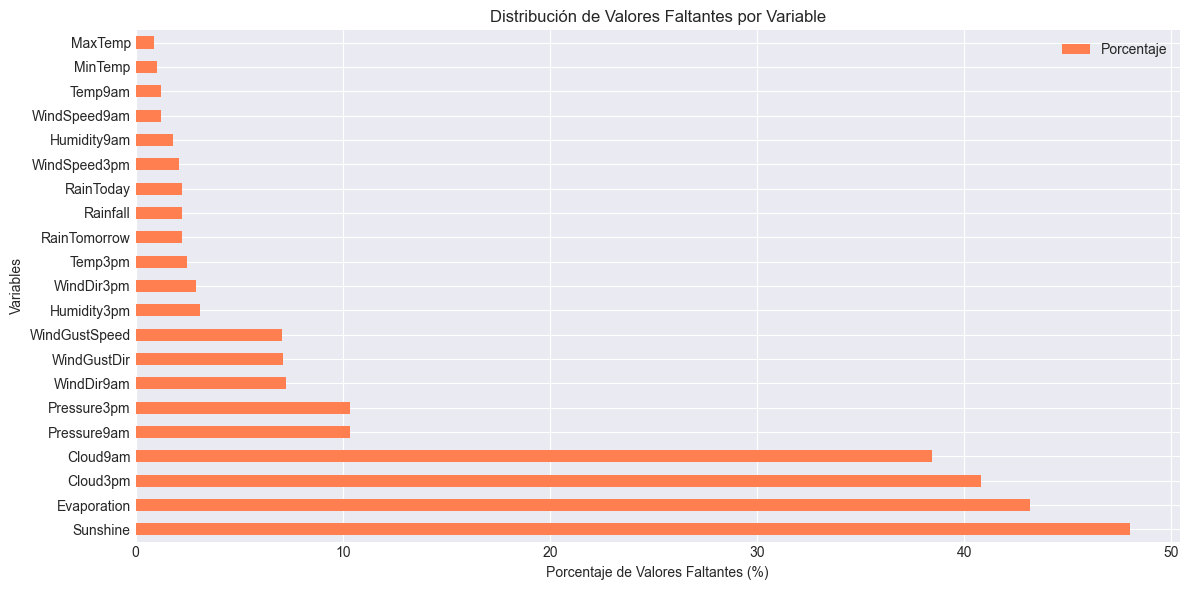

In [40]:
plt.figure(figsize=(12, 6))
missing_df['Porcentaje'].plot(kind='barh', color='coral')
plt.xlabel('Porcentaje de Valores Faltantes (%)')
plt.ylabel('Variables')
plt.title('Distribución de Valores Faltantes por Variable')
plt.legend()
plt.tight_layout()
plt.show()

### 2.2 Análisis de la Variable Objetivo

La variable objetivo `RainTomorrow` es binaria (Yes/No). Es fundamental analizar su distribución para detectar posibles desbalances de clases, lo cual afectará la elección de métricas y técnicas de modelado.

In [41]:
# Análisis de la distribución de la variable objetivo

print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO: RainTomorrow \n")

print("Conteo:")
print(df['RainTomorrow'].value_counts())

print("\nPorcentaje:")
print(df['RainTomorrow'].value_counts(normalize=True) * 100) 

print(f"\nValores nulos en RainTomorrow: {df['RainTomorrow'].isnull().sum()}")

DISTRIBUCIÓN DE LA VARIABLE OBJETIVO: RainTomorrow 

Conteo:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Porcentaje:
RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64

Valores nulos en RainTomorrow: 3267


VAMOS A TENER QUE HACER ALGUN BALANCEO DE CLASES


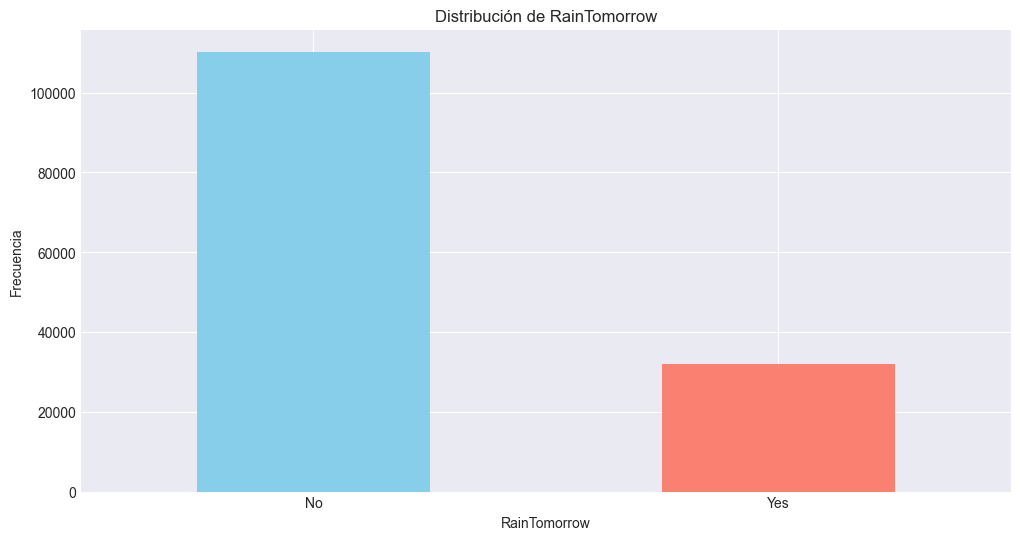

In [42]:
# Visualización de la distribución de la variable objetivo
#Grafico de barras
plt.figure(figsize=(12, 6))
df['RainTomorrow'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], rot=0)
plt.title('Distribución de RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Frecuencia')
plt.show()


### 2.3 Análisis de Ciudades (Location)

El dataset contiene observaciones de múltiples ciudades. Es importante entender la distribución geográfica de los datos.

In [43]:
# Análisis de la distribución de observaciones por ciudad
print(f"Número total de ciudades: {df['Location'].nunique()}\n")
print("Top 10 ciudades con más observaciones:")
print(df['Location'].value_counts().head(10))

Número total de ciudades: 49

Top 10 ciudades con más observaciones:
Location
Canberra       3436
Sydney         3344
Adelaide       3193
Darwin         3193
Hobart         3193
Perth          3193
Melbourne      3193
Brisbane       3193
Albury         3040
MountGinini    3040
Name: count, dtype: int64


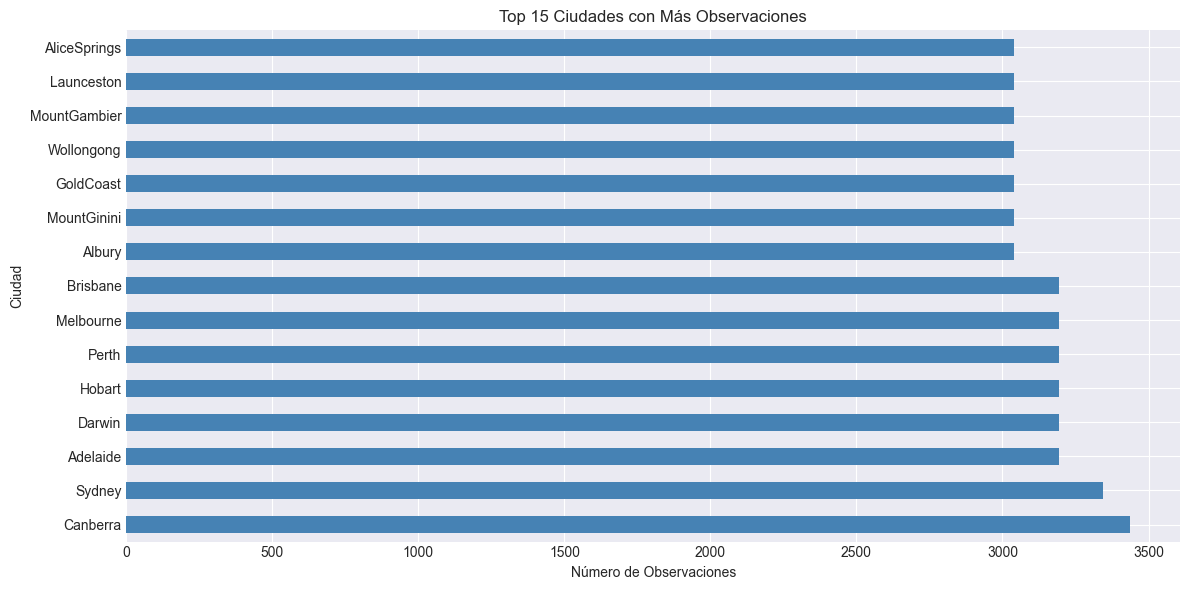

In [44]:
# Visualización de las ciudades con más observaciones
plt.figure(figsize=(12, 6))
df['Location'].value_counts().head(15).plot(kind='barh', color='steelblue')
plt.xlabel('Número de Observaciones')
plt.ylabel('Ciudad')
plt.title('Top 15 Ciudades con Más Observaciones')
plt.tight_layout()
plt.show()